In [1]:
## Advanced Course in Machine Learning
## Week 1
## Exercise 3

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## a)
dataFile = "ex_1_data.csv"
data = pd.read_csv(dataFile, header=None)
# N = 200, D = 5
dataOrig = data.copy()

# Standardize the data
data = pd.DataFrame(StandardScaler().fit_transform(data))
dataCopy = data.copy() # Do a comparison of the phases with the SKlearn PCA to double check


In [2]:
## b)
covarianceMatrix = data.cov()
print('\nCovariance matrix: \n')
print(covarianceMatrix)


Covariance matrix: 

          0         1         2         3         4
0  1.005025  0.739652  0.820478  0.633482  0.562540
1  0.739652  1.005025  0.966482  0.810714  0.445044
2  0.820478  0.966482  1.005025  0.877471  0.583129
3  0.633482  0.810714  0.877471  1.005025  0.822471
4  0.562540  0.445044  0.583129  0.822471  1.005025


In [3]:
eigenval, eigenvect = np.linalg.eig(covarianceMatrix)
eigenvalPD = pd.DataFrame(eigenval, columns=['eigval'])
eigenvectPD = pd.DataFrame(eigenvect)

eigenvalPD['origIndex'] = eigenvalPD.index
print(eigenvalPD)

     eigval  origIndex
0  3.934713          0
1  0.680644          1
2  0.362914          2
3  0.016532          3
4  0.030322          4


In [4]:
print(eigenvectPD)

          0         1         2         3         4
0 -0.427797 -0.235029  0.822547  0.239164  0.167237
1 -0.457835 -0.432542 -0.329357  0.324983 -0.623863
2 -0.488330 -0.265369 -0.140183 -0.793940  0.202787
3 -0.472573  0.274424 -0.411255  0.423317  0.594170
4 -0.381558  0.782266  0.161735 -0.166281 -0.434357


In [5]:
eigenvalPD = eigenvalPD.sort_values(by=['eigval'], ascending=False)
print(eigenvalPD)

     eigval  origIndex
0  3.934713          0
1  0.680644          1
2  0.362914          2
4  0.030322          4
3  0.016532          3


In [6]:
eigenvectPD = eigenvectPD.transpose()
print(eigenvectPD)

          0         1         2         3         4
0 -0.427797 -0.457835 -0.488330 -0.472573 -0.381558
1 -0.235029 -0.432542 -0.265369  0.274424  0.782266
2  0.822547 -0.329357 -0.140183 -0.411255  0.161735
3  0.239164  0.324983 -0.793940  0.423317 -0.166281
4  0.167237 -0.623863  0.202787  0.594170 -0.434357


In [7]:
eigenvectPD = eigenvectPD.reindex(eigenvalPD.index)
print(eigenvectPD)

          0         1         2         3         4
0 -0.427797 -0.457835 -0.488330 -0.472573 -0.381558
1 -0.235029 -0.432542 -0.265369  0.274424  0.782266
2  0.822547 -0.329357 -0.140183 -0.411255  0.161735
4  0.167237 -0.623863  0.202787  0.594170 -0.434357
3  0.239164  0.324983 -0.793940  0.423317 -0.166281


In [8]:
eigenvectPD = eigenvectPD.reset_index(drop=True)
#eigenvectPD = eigenvectPD.transpose()
print(eigenvectPD)

          0         1         2         3         4
0 -0.427797 -0.457835 -0.488330 -0.472573 -0.381558
1 -0.235029 -0.432542 -0.265369  0.274424  0.782266
2  0.822547 -0.329357 -0.140183 -0.411255  0.161735
3  0.167237 -0.623863  0.202787  0.594170 -0.434357
4  0.239164  0.324983 -0.793940  0.423317 -0.166281


In [9]:
projections = list()
for i in range(len(eigenvectPD.iloc[0])):
    projections.append(pd.DataFrame(np.dot(eigenvectPD.iloc[0:(i+1),:],data.transpose())))
#print (projections)

for i in range(len(projections)):
     projections[i] = projections[i].transpose()
    
print(projections)

[            0
0    2.245771
1   -0.269686
2    0.006852
3   -0.636282
4    0.100731
5   -1.391774
6   -0.737156
7    0.732246
8    4.047446
9    0.543931
10  -1.138579
11   0.451396
12  -2.484282
13   0.665084
14  -2.199552
15   1.539196
16  -0.777309
17   0.130579
18   0.222156
19   3.097196
20  -0.338547
21  -1.300634
22   0.539934
23  -0.873641
24  -0.232244
25  -0.967496
26  -2.822075
27  -2.111313
28  -2.696323
29   3.726022
..        ...
170  0.179903
171  1.844778
172  0.794892
173  1.685902
174  2.672315
175  2.012946
176 -2.301578
177  0.964199
178  0.362016
179 -1.298329
180 -0.770111
181 -1.847722
182 -2.107936
183  0.529237
184  0.322844
185 -3.566684
186  0.046447
187 -1.107218
188  3.050889
189 -3.260999
190  2.752027
191 -1.361526
192  1.002438
193  3.243824
194 -1.529512
195  0.823547
196 -4.369505
197  0.080869
198  1.155797
199 -0.321891

[200 rows x 1 columns],             0         1
0    2.245771 -0.082226
1   -0.269686 -0.703197
2    0.006852  0.883291
3   -0.636

Text(0, 0.5, 'Second eigenvector projection')

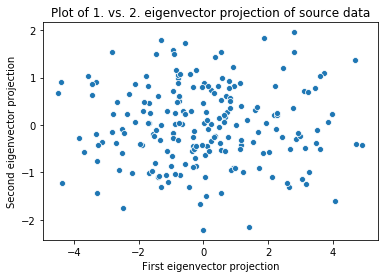

In [10]:
sns.scatterplot(projections[4].iloc[:,0], projections[4].iloc[:,1]).plot()
plt.title('Plot of 1. vs. 2. eigenvector projection of source data')
plt.xlabel('First eigenvector projection')
plt.ylabel('Second eigenvector projection')

In [11]:
print (len(projections))
for i in range(len(projections)):
    #print(projections[i])
    projections[i] = pd.DataFrame(projections[i], columns=None)
    #projectionDF.append(pd.Series(projections[i]))
#print(dataOrig)
print(projections)

5
[            0
0    2.245771
1   -0.269686
2    0.006852
3   -0.636282
4    0.100731
5   -1.391774
6   -0.737156
7    0.732246
8    4.047446
9    0.543931
10  -1.138579
11   0.451396
12  -2.484282
13   0.665084
14  -2.199552
15   1.539196
16  -0.777309
17   0.130579
18   0.222156
19   3.097196
20  -0.338547
21  -1.300634
22   0.539934
23  -0.873641
24  -0.232244
25  -0.967496
26  -2.822075
27  -2.111313
28  -2.696323
29   3.726022
..        ...
170  0.179903
171  1.844778
172  0.794892
173  1.685902
174  2.672315
175  2.012946
176 -2.301578
177  0.964199
178  0.362016
179 -1.298329
180 -0.770111
181 -1.847722
182 -2.107936
183  0.529237
184  0.322844
185 -3.566684
186  0.046447
187 -1.107218
188  3.050889
189 -3.260999
190  2.752027
191 -1.361526
192  1.002438
193  3.243824
194 -1.529512
195  0.823547
196 -4.369505
197  0.080869
198  1.155797
199 -0.321891

[200 rows x 1 columns],             0         1
0    2.245771 -0.082226
1   -0.269686 -0.703197
2    0.006852  0.883291
3   -0.6

In [12]:
#print(eigenvect)
#transpEigenvect = eigenvect.transpose()
#print(projections[0])
#reconstruct = np.dot(transpEigenvect[:,0], projections[0])
#print('1 dim\n')
#print(np.asmatrix(eigenvect[0:0]).transpose())
#print('2 dim\n')
#print(np.asmatrix(eigenvect[0:1]).transpose())

reconstructs = list()
for i in range(len(eigenvect)):
    reconstructs.append(np.dot(eigenvectPD.iloc[0:(i+1),:].transpose(), projections[i].transpose()).transpose())
#reconstruct = np.dot(eigenvect[:,0], projections[0].transpose())
print (len(reconstructs))
print(reconstructs[1])
       

5
[[-0.9414079  -0.99262652 -1.07485646 -1.08385504 -0.92121459]
 [ 0.28064254  0.4276341   0.31830215 -0.06552773 -0.44718564]
 [-0.21053012 -0.38519752 -0.23774354  0.23915842  0.68835383]
 [ 0.20155064  0.16129202  0.23094676  0.38317999  0.47792368]
 [ 0.0605073   0.14454444  0.0677833  -0.16856774 -0.38325402]
 [ 0.45389988  0.37679619  0.51988255  0.82292792  1.00199563]
 [ 0.56489012  0.79673883  0.6417248   0.05699515 -0.54928765]
 [-0.37532673 -0.44948799 -0.42766487 -0.27356077 -0.07278812]
 [-1.35441335 -1.15911071 -1.55074186 -2.35298609 -2.79936738]
 [-0.10845365 -0.0203854  -0.12534168 -0.40210981 -0.62105322]
 [ 0.41909474  0.39616217  0.47924018  0.61744286  0.66071618]
 [-0.38562504 -0.56097326 -0.43780146  0.01147167  0.46854368]
 [ 1.47441446  1.89497733  1.67793445  0.69335734 -0.42221971]
 [-0.3229521  -0.37522701 -0.36817268 -0.26942746 -0.12585404]
 [ 1.17762639  1.44258568  1.34132269  0.76311372  0.05154491]
 [-0.5740111  -0.54927476 -0.65628148 -0.82598921 -0.

In [13]:
losses = list()

for rec in reconstructs:
    lossMatrix = dataOrig.sub(rec)
    print(lossMatrix)
    lossMatrix = lossMatrix**2
    print(lossMatrix)
    losses.append(lossMatrix.values.sum())
print(losses)

            0         1         2         3         4
0    0.725733  0.357193  0.040677  0.101290  0.427892
1   -0.195371  0.078528  0.422304 -0.003446 -0.382901
2   -0.131069 -0.213863 -0.160654  0.163238  0.340614
3   -0.116199 -0.243312 -0.019715 -0.063689  0.002222
4    0.021092  0.138118  0.124190 -0.035397 -0.159565
5   -0.250396 -0.385203 -0.339644 -0.099714 -0.010042
6   -0.187353  0.122504  0.301025 -0.107360 -0.606268
7    0.166253  0.065248 -0.134422  0.215040  0.210394
8    0.822484  1.349062  0.407488  0.109712  0.206335
9    0.092692  0.235031  0.196618  0.027047 -0.120459
10   0.419920 -0.396282 -0.463002 -0.538062  0.036566
11   0.003106 -0.147335 -0.078570  0.159317  0.409234
12   0.243233 -0.276391  0.250852 -0.866004 -1.093897
13   0.145521  0.129499 -0.064220 -0.002699  0.234768
14  -0.654961 -0.178032  0.317893 -0.043448 -0.941257
15  -0.246537  0.705698  0.103635  0.331382  0.135292
16  -0.321530 -0.372879 -0.376583  0.305665  0.166412
17  -0.220139  0.185784  0.0

Text(0, 0.5, 'Reconstruct squared error loss')

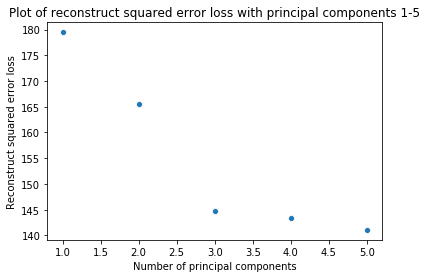

In [14]:
sns.scatterplot(range(1,6), losses).plot()
plt.title('Plot of reconstruct squared error loss with principal components 1-5')
plt.xlabel('Number of principal components')
plt.ylabel('Reconstruct squared error loss')

In [15]:
pca = PCA(n_components=5)
pca.fit(dataCopy)
components = pca.fit_transform(dataCopy)
cov = pca.get_covariance()
params = pca.get_params()
eigenvalues = pca.explained_variance_ 
print('Eigenvalues in descending order:')
print(eigenvalues)
eigenvalSquared = eigenvalues**2
print(eigenvalSquared)

Eigenvalues in descending order:
[3.93471299 0.68064441 0.36291439 0.03032195 0.01653189]
[1.54819663e+01 4.63276817e-01 1.31706853e-01 9.19420402e-04
 2.73303432e-04]


Text(0, 0.5, 'Second eigenvector projection')

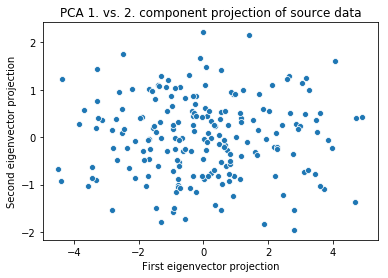

In [16]:
sns.scatterplot(components[:,0], components[:,1]).plot()
plt.title('PCA 1. vs. 2. component projection of source data')
plt.xlabel('First eigenvector projection')
plt.ylabel('Second eigenvector projection')

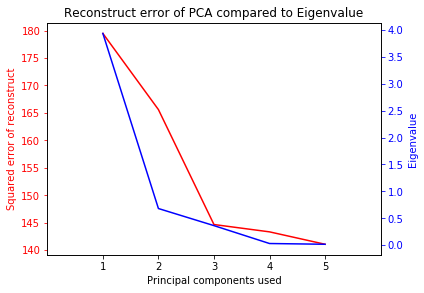

In [17]:
max_comp=5
start=1
error_record=[]
for i in range(start,max_comp+1):
    pca = PCA(n_components=i)
    pca2_results = pca.fit_transform(dataCopy)
    pca2_proj_back=pca.inverse_transform(pca2_results)
    lossMatrix = dataOrig.sub(pca2_proj_back, axis='columns')**2
    error_record.append(lossMatrix.values.sum())

fig, ax1 = plt.subplots()
ax1.plot(error_record,'r')
ax1.set_xlabel('Principal components used')
ax1.set_ylabel('Squared error of reconstruct', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.plot(eigenvalues, 'b')
ax2.set_ylabel('Eigenvalue', color='b')
ax2.tick_params('y', colors='b')

fig.tight_layout()
plt.title("Reconstruct error of PCA compared to Eigenvalue")
plt.xticks(range(len(error_record)), range(start,max_comp+1))
plt.xlim([-1, len(error_record)])
plt.show()